In [80]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from io import BytesIO
import os
import random

In [81]:
train_dir = "horse-or-human"
os.listdir(train_dir)

['.DS_Store', 'humans', 'horses']

In [82]:
horse_train_dir = os.path.join(train_dir,"horses")
human_train_dir = os.path.join(train_dir,"humans")

In [83]:
train_horse_names = os.listdir(horse_train_dir)
print(f"5 files in horses subdir: {train_horse_names[:5]}")
train_human_names = os.listdir(human_train_dir)
print(f"5 files in humans subdir:{train_human_names[:5]}")

5 files in horses subdir: ['horse43-5.png', 'horse06-5.png', 'horse20-6.png', 'horse04-7.png', 'horse41-7.png']
5 files in humans subdir:['human17-22.png', 'human10-17.png', 'human10-03.png', 'human07-27.png', 'human09-22.png']


In [84]:
print(f"Number of horse images to train: {len(os.listdir(horse_train_dir))}")
print(f"Number of human images to train: {len(os.listdir(human_train_dir))}")

Number of horse images to train: 500
Number of human images to train: 527


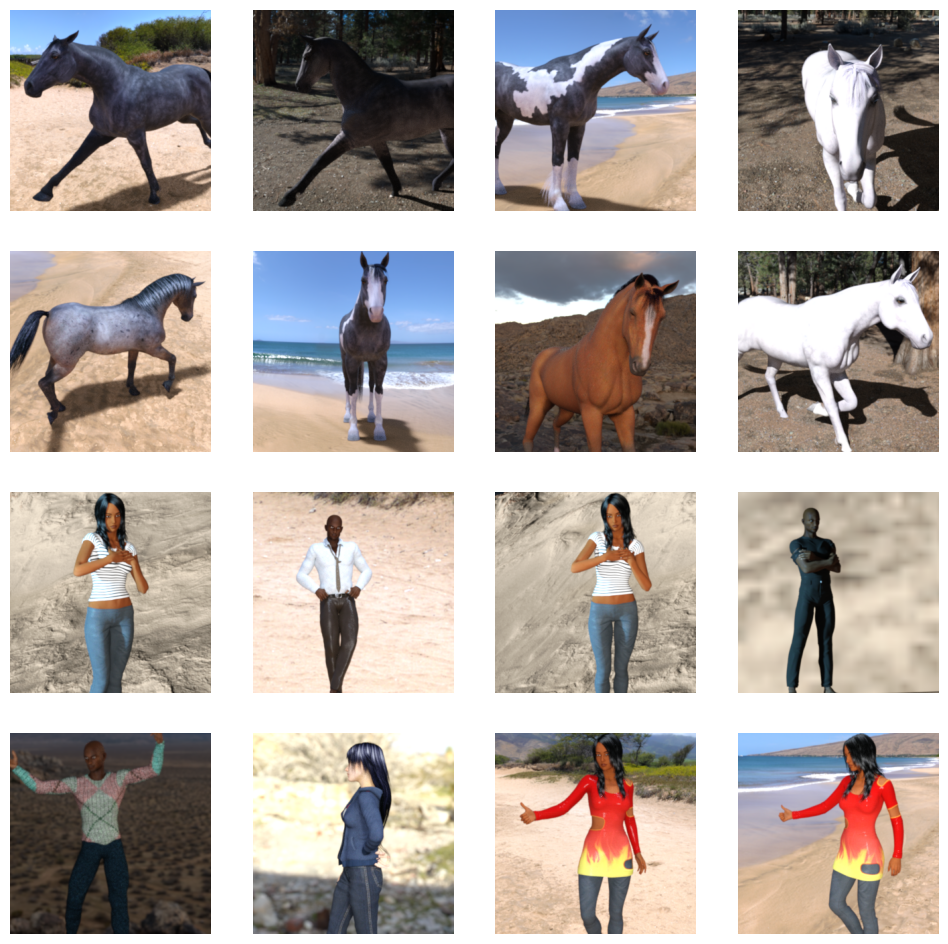

In [85]:
# Parameters for your graph; you will output images in a 4x4 configuration
nrows = 4
ncols = 4

# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 3, nrows * 3)

next_horse_pix = [os.path.join(horse_train_dir, fname)
                for fname in random.sample(train_horse_names, k=8)]
next_human_pix = [os.path.join(human_train_dir, fname)
                for fname in random.sample(train_human_names, k=8)]

for i, img_path in enumerate(next_horse_pix + next_human_pix):
    # Set up subplot; subplot indices start at 1
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off') # Don't show axes (or gridlines)

    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()

## Small model 

In [110]:
model= tf.keras.models.Sequential([
    tf.keras.Input(shape = (300,300,3)),
    
    tf.keras.layers.Conv2D(16, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(32, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation = "relu"),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Flatten(),

    tf.keras.layers.Dense(units = 512, activation = "relu"),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(units = 1, activation = "sigmoid")
])

In [146]:
model.compile(
    optimizer = tf.optimizers.RMSprop(learning_rate = 1e-5),
    loss =  tf.keras.losses.BinaryCrossentropy(label_smoothing=0.05),
    metrics = [tf.keras.metrics.BinaryAccuracy(name="Accuracy")]
)

In [147]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_15 (Conv2D)              │ (None, 298, 298, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 149, 149, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 147, 147, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 73, 73, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 71, 71, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 35, 35, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 33, 33, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 14, 14, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_19 (MaxPooling2D) │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │     1,606,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,704,097 (6.50 MB)

 Trainable params: 1,704,097 (6.50 MB)

 Non-trainable params: 0 (0.00 B)

In [89]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_dir,
    image_size = (300,300),
    batch_size = 32,
    label_mode ="binary"
)

print(f"Type: {type(train_dataset)}")
issubclass(type(train_dataset), tf.data.Dataset)

Found 1027 files belonging to 2 classes.
Type: <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


True

In [127]:
sample_batch = list(train_dataset.take(1))[0]
print(f"Sample batch data type: {type(sample_batch)}")
print(f"Len of the sample batch: {len(sample_batch)}")

image_batch = sample_batch[0]
label_batch = sample_batch[1]

Sample batch data type: <class 'tuple'>
Len of the sample batch: 2


In [128]:
np.max(image_batch[0].numpy())

np.float32(255.0)

In [129]:
np.min(image_batch[0].numpy())

np.float32(0.0)

In [130]:
layer_rescaler = tf.keras.layers.Rescaling(scale = 1./255)

In [131]:
rescaled_img = layer_rescaler(image_batch[0]).numpy()

In [132]:
np.max(rescaled_img)

np.float32(1.0)

In [133]:
np.min(rescaled_img)

np.float32(0.0)

In [134]:
train_dataset_scaled = train_dataset.map(lambda image,label:(layer_rescaler(image),label))

In [148]:
list(train_dataset_scaled.take(1))[0]

(<tf.Tensor: shape=(32, 300, 300, 3), dtype=float32, numpy=
 array([[[[0.0509804 , 0.05882353, 0.0509804 ],
          [0.07058824, 0.08235294, 0.07450981],
          [0.07843138, 0.08627451, 0.07450981],
          ...,
          [0.33333334, 0.30980393, 0.16470589],
          [0.3372549 , 0.32156864, 0.20784315],
          [0.2627451 , 0.2509804 , 0.1764706 ]],
 
         [[0.04313726, 0.0509804 , 0.04313726],
          [0.0509804 , 0.05882353, 0.0509804 ],
          [0.05882353, 0.06666667, 0.05882353],
          ...,
          [0.2901961 , 0.2784314 , 0.16470589],
          [0.2784314 , 0.27058825, 0.18431373],
          [0.18039216, 0.18039216, 0.13725491]],
 
         [[0.0509804 , 0.0627451 , 0.05490196],
          [0.07450981, 0.08235294, 0.07450981],
          [0.10196079, 0.10980393, 0.09803922],
          ...,
          [0.18039216, 0.19215688, 0.13333334],
          [0.18431373, 0.18431373, 0.14117648],
          [0.12156864, 0.1254902 , 0.09803922]],
 
         ...,
 
      

In [136]:
validation_dir = "validation-horse-or-human"

os.listdir(validation_dir)
horse_validation_dir = os.path.join(validation_dir, "horses")
human_validation_dir = os.path.join(validation_dir, "humans")

In [137]:
print(os.listdir(horse_validation_dir)[:4])
print(os.listdir(human_validation_dir)[:5])

['horse1-204.png', 'horse2-112.png', 'horse3-498.png', 'horse5-032.png']
['valhuman04-20.png', 'valhuman03-01.png', 'valhuman04-08.png', 'valhuman03-15.png', 'valhuman01-04.png']


In [138]:
validation_dataset = tf.keras.utils.image_dataset_from_directory(
    validation_dir,
    image_size = (300,300),
    batch_size = 32,
    label_mode ="binary"
)

print(f"Validation dataset type: {type(validation_dataset)}")

Found 256 files belonging to 2 classes.
Validation dataset type: <class 'tensorflow.python.data.ops.prefetch_op._PrefetchDataset'>


In [139]:
class callback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs ={}):
        if logs["Accuracy"] > .98:
            self.model.stop_training = True

In [140]:
validation_set_scaled = validation_dataset.map(lambda image, label:(layer_rescaler(image), label))
sample_val_batch = list(validation_set_scaled.take(1))[0]
image_val_batch = sample_val_batch[0].numpy()
np.min(image_val_batch)
np.max(image_val_batch)
validation_dataset.class_names

['horses', 'humans']

In [149]:
model.fit(train_dataset_scaled, validation_data= validation_set_scaled,epochs = 15, callbacks = [callback()])

Epoch 1/15
33/33 ━━━━━━━━━━━━━━━━━━━━ 23s 671ms/step - Accuracy: 0.9932 - loss: 0.1519 - val_Accuracy: 0.8164 - val_loss: 0.8476


In [142]:
val_loss, val_accuracy = model.evaluate(validation_set_scaled)

8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - Accuracy: 0.8164 - loss: 0.8388


In [143]:
print(f"Loss in validation set: {val_loss}\n Accuracy in validation set: {val_accuracy} ")

Loss in validation set: 0.8388116359710693
 Accuracy in validation set: 0.81640625 


In [144]:
def predict_image(filename):
    img = tf.keras.utils.load_img(filename, target_size = (300,300))
    img = tf.keras.utils.img_to_array(img)
    img = layer_rescaler(img)
    img = np.expand_dims(img, axis = 0)

    prediction = model.predict(img)

    if prediction > 0.5:
        print(f"{filename} is a human")
    else:
        print(filename, "is a horse")

    

In [145]:
predict_image("591.jpg")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
591.jpg is a horse
